In [0]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

import requests
from io import BytesIO
from PIL import Image

In [0]:
model = ResNet50(weights='imagenet')

In [0]:
url_img = 'https://www.feldmanwoodhaven.com/assets/stock/colormatched_01/white/640/cc_2019rmt11_01_640/cc_2019rmt110064_01_640_pau.jpg?height=400'

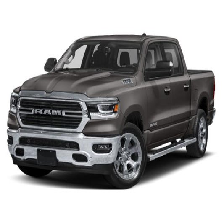

In [63]:
responese = requests.get(url_img)
img = Image.open( BytesIO(responese.content) )
img = img.resize( (224, 224) ) # konwertujemy obrazek na rozmiar 224 x 224 - tak wymaga ta biblioteka
img

In [64]:
X = image.img_to_array(img) # konwertujemy nasz obrazek w tablicę
X = np.expand_dims(X, axis=0) # zmieniamy obraz na tablicę 4D (cztero wymiarową) a tutaj dokładnie dodajemy czwarty wimar którym jest jedynka ( np.expand_dims(X, axis=0).shape )
X.shape

(1, 224, 224, 3)

In [0]:
y_pred = model.predict(X)

In [66]:
decode_predictions(y_pred, top=3)

[[('n03930630', 'pickup', 0.68477404),
  ('n04461696', 'tow_truck', 0.06723011),
  ('n02930766', 'cab', 0.04621619)]]